In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
import pandas as pd

In [3]:
#输入文件路径
CURRENT_PATH = os.getcwd()
S_PATH = os.path.join(CURRENT_PATH,'data','simply_id')
SONG_NUM_ID  = os.path.join(S_PATH,'song_num_id.csv')

In [21]:
#输出文件路径
SONG_NUM_LOG = os.path.join(S_PATH,'song_num_log.csv')  
#对company’,’artist_name_i lyricist_id d’,’lyricist_id’,’composer_id’的‘_song_cnt’和‘_rec_cnt’通过log规范

In [9]:
#读取文件
song = pd.read_csv(SONG_NUM_ID)
print(str(song[:0]))

Empty DataFrame
Columns: [song_id, song_length, artist_name, composer, lyricist, song_cnt, song_re_cnt, re_rate, name, song_year, country, company, first_genre_id, second_genre_id, genre_id_cnt, artist_name_id, lyricist_id, composer_id, language_id, company_song_cnt, artist_name_id_song_cnt, lyricist_id_song_cnt, composer_id_song_cnt, language_id_song_cnt, company_rec_cnt, company_re_rate, artist_name_id_rec_cnt, artist_name_id_re_rate, lyricist_id_rec_cnt, lyricist_id_re_rate, composer_id_rec_cnt, composer_id_re_rate, language_id_rec_cnt, language_id_re_rate, first_genre_id_song_cnt, second_genre_id_song_cnt, first_genre_id_rec_cnt, first_genre_id_re_rate, second_genre_id_rec_cnt, second_genre_id_re_rate]
Index: []

[0 rows x 40 columns]


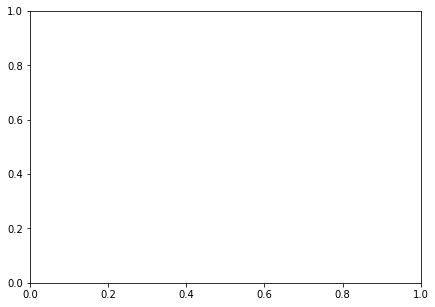

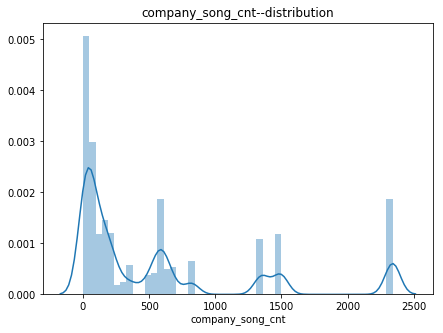

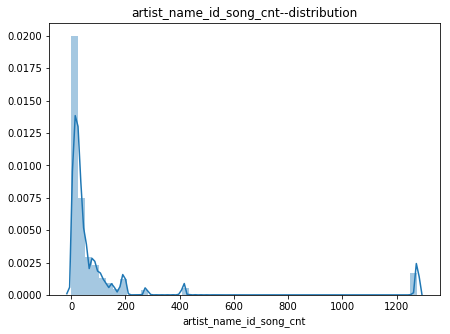

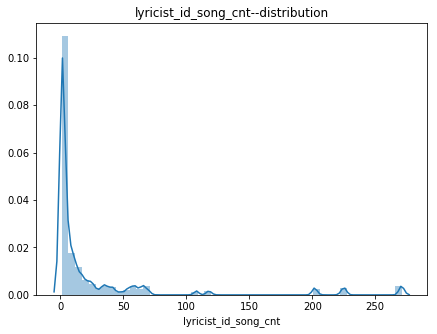

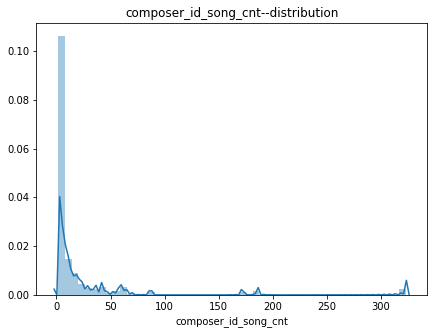

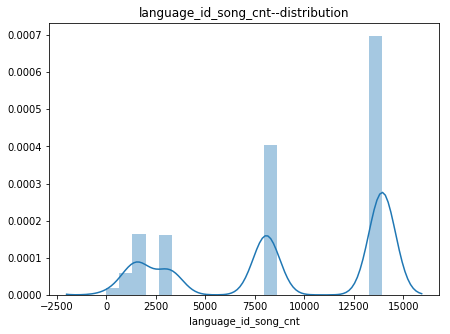

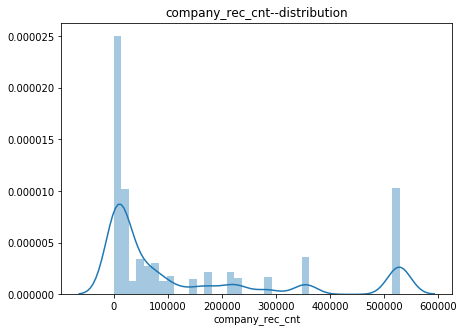

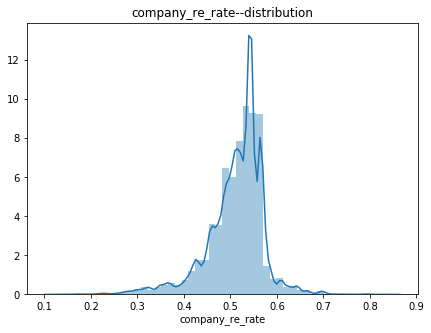

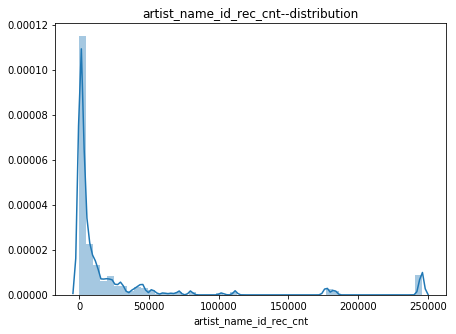

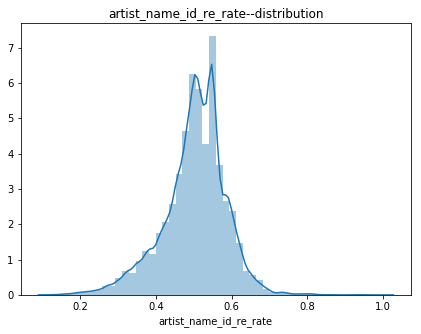

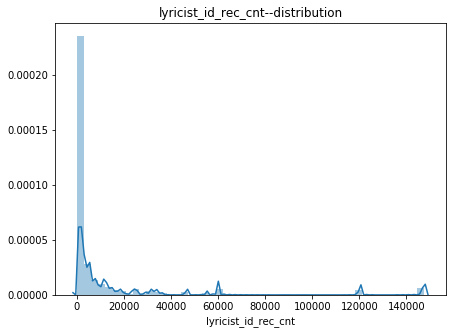

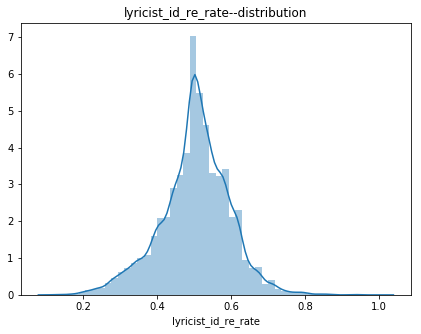

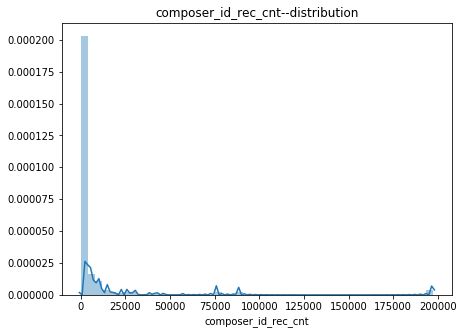

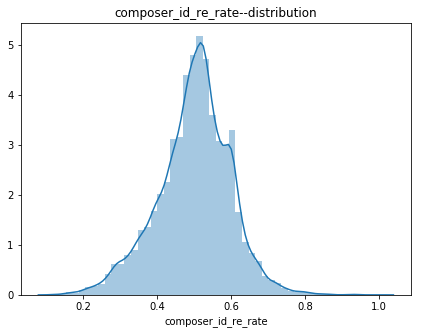

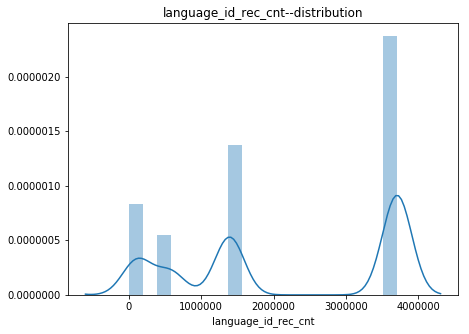

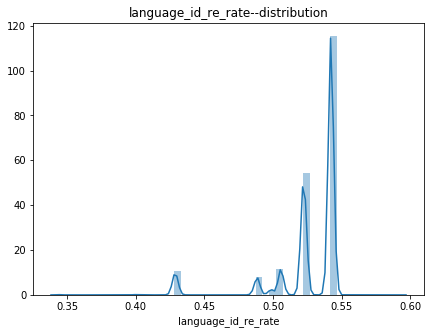

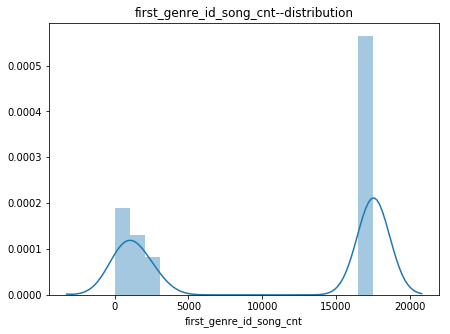

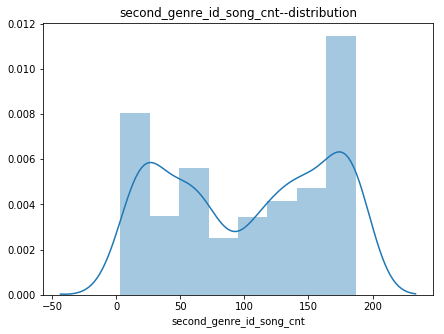

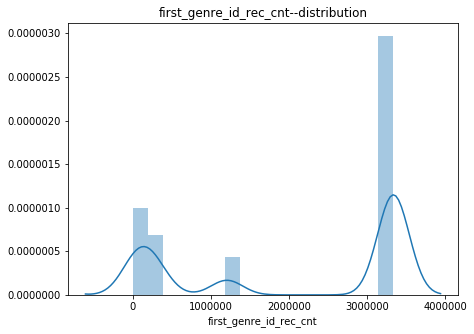

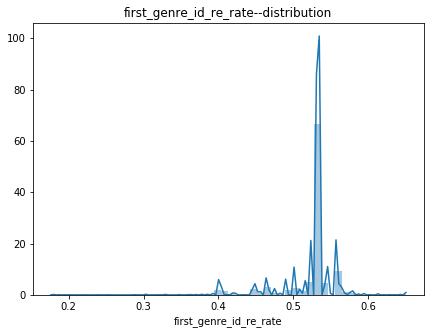

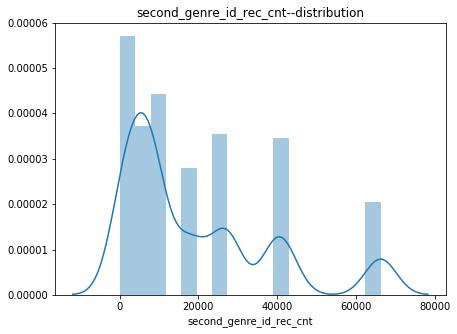

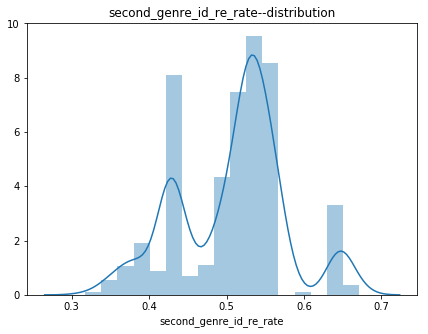

In [19]:
for i in range(19,40):
    cols = song.iloc[1:,[i]]
    for col in cols:
        plt.figure(figsize = (7,5))
        sbn.distplot(song[col].dropna())
        plt.title((col+'--distribution'))
        plt.show()

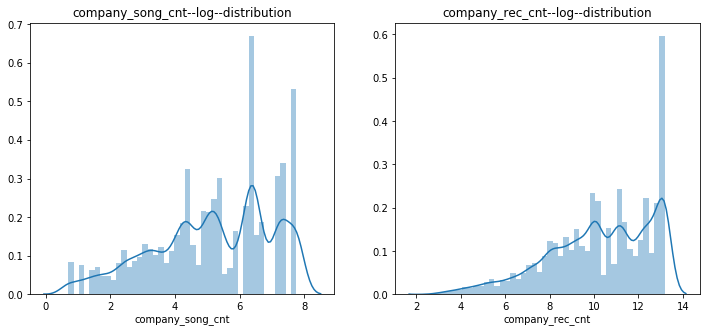

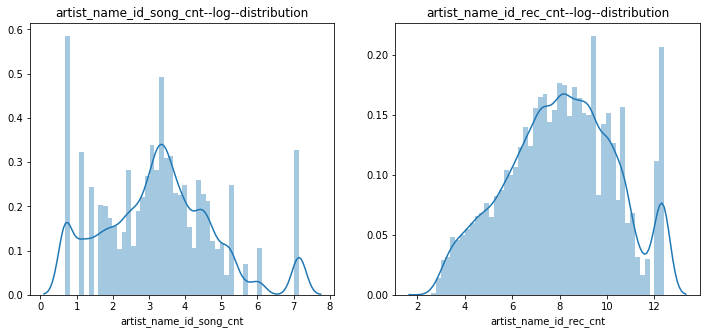

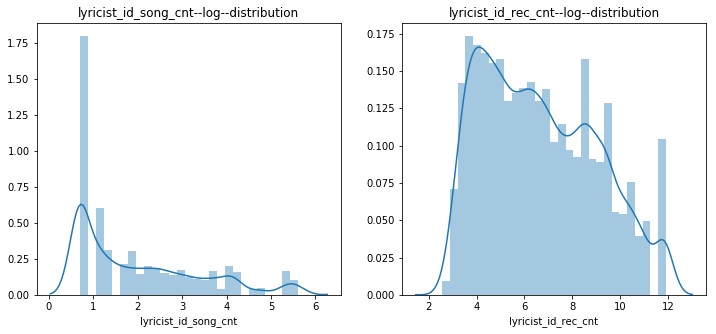

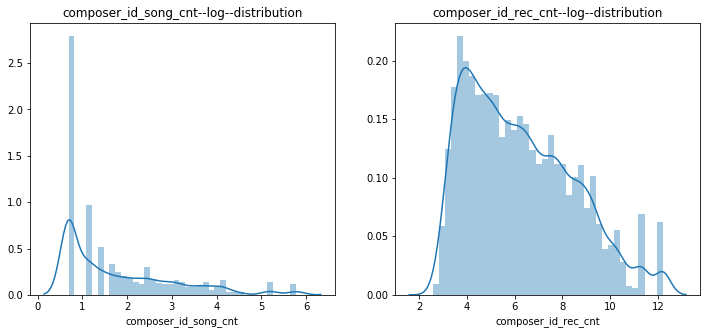

In [20]:
cols_log = ['company','artist_name_id','lyricist_id','composer_id']
for col in cols_log:
    col_song_cnt = col+'_song_cnt'
    col_rec_cnt = col+'_rec_cnt'
    song[col_song_cnt] = np.log1p(song[col_song_cnt])
    song[col_rec_cnt] = np.log1p(song[col_rec_cnt])
    plt.figure(figsize = (12,5))
    plt.subplot(1,2,1)
    sbn.distplot(song[col_song_cnt].dropna())
    plt.title((col_song_cnt+'--log--distribution'))
    plt.subplot(1,2,2)
    sbn.distplot(song[col_rec_cnt].dropna())
    plt.title((col_rec_cnt+'--log--distribution'))

    plt.show()

In [22]:
song.to_csv(SONG_NUM_LOG,encoding = 'utf-8',index = False)